**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**
Owner: Colin, Prina

(Prina) 1) Hypothesis 1: Reducing average trip length (more short trips, fewer long trips) reduced the subsequent COVID-19 Case Count
- Regression

(Colin) 2) Hypothesis 2: Staying at home (higher % staying at home) reduced the subsequent COVID-19 Case Count
- Regression

In [48]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pathlib import Path
import os

In [105]:
#DATA READ IN
path = "../output_data/consolidated_new.csv"
consolidated = pd.read_csv(path)

path = "../output_data/national_covid.csv"
nation = pd.read_csv(path)

In [123]:
#WEEKLY GROUPING
df = consolidated
df["Date"] = df["Date"].astype('datetime64[ns]')
weekly_consolidated = df.groupby("state").resample('W-Wed', label='right', closed = 'right', on='Date').sum().reset_index().sort_values(by='Date')

In [124]:
#DATA CLEANUP, drop partial weeks
weekly_consolidated = weekly_consolidated.drop(['tot_cases%',"tot_death%","Population Staying at Home%","Population Not Staying at Home%"],axis = 1,inplace=False)
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-01-02"]
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-11-24"]

In [125]:
weekly_consolidated["%HOME"] = weekly_consolidated["Population Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["%AWAY"] = weekly_consolidated["Population Not Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["DEATHS"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000
weekly_consolidated["CASES"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000

In [140]:
pre_covid = weekly_consolidated[weekly_consolidated["Date"] <= "2020-03-04"]
post_covid = weekly_consolidated[weekly_consolidated["Date"] > "2020-03-04"]

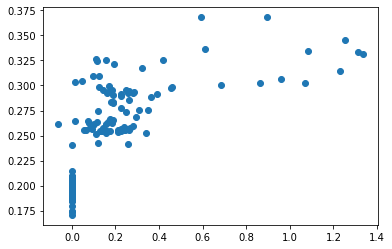

In [130]:

df = weekly_consolidated[weekly_consolidated["state"] == "CA"]
x = df["CASES"]
y = df["%HOME"]
plt.scatter(x,y)

(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

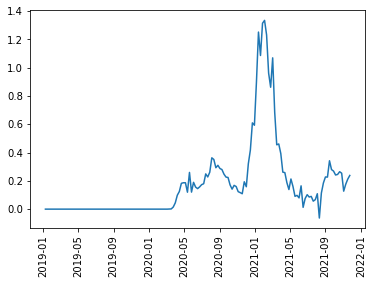

In [136]:
df = weekly_consolidated[weekly_consolidated["state"] == "CA"]
x = df["Date"]
y = df["CASES"]
plt.plot(x,y)
plt.xticks(rotation='vertical')

In [142]:
post_covid["Date"]

7054   2020-03-11
2038   2020-03-11
6294   2020-03-11
7206   2020-03-11
1430   2020-03-11
          ...    
6079   2021-11-24
1519   2021-11-24
6231   2021-11-24
3799   2021-11-24
7751   2021-11-24
Name: Date, Length: 4590, dtype: datetime64[ns]